In [9]:
#!pip install -v ktrain
#!pip install 'tensorflow-gpu>=2.2.0'

In [4]:
import tensorflow as tf
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from os.path import join as pathjoin

print(tf.__version__)

2.3.0


In [5]:
from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())
#print(tf.config.experimental.list_physical_devices('XLA_GPU'))
tf.test.gpu_device_name()

'/device:GPU:0'

In [6]:
#!mkdir '/home/mlepekhin/models'

In [7]:
DATA_DIR = '/home/mlepekhin/data'
MODELS_DIR = '/home/mlepekhin/models'

In [8]:
df_en_test = pd.read_csv(pathjoin(DATA_DIR, 'en_test'))
df_ru_test = pd.read_csv(pathjoin(DATA_DIR, 'ru_test'))
df_multi_train = pd.read_csv(pathjoin(DATA_DIR, 'multi_train'))
df_multi_test = pd.read_csv(pathjoin(DATA_DIR, 'multi_test'))
df_multi_train_balanced = pd.read_csv(pathjoin(DATA_DIR, 'multi_train_balanced'))

In [9]:
df_en_test.values.shape

(422, 3)

In [10]:
target_names = np.unique(df_multi_train.target)
print(target_names)

['A1' 'A11' 'A12' 'A14' 'A16' 'A17' 'A22' 'A4' 'A7' 'A8' 'A9']


In [11]:
X_train, X_test = df_multi_train['text'].values, df_multi_test['text'].values
y_train, y_test = df_multi_train['target'].values, df_multi_test['target'].values

X_train_balanced = df_multi_train_balanced['text'].values
y_train_balanced = df_multi_train_balanced['target'].values

X_test_ru = df_ru_test['text'].values
y_test_ru = df_ru_test['target'].values
X_test_en = df_en_test['text'].values
y_test_en = df_en_test['target'].values

In [12]:
import ktrain
from ktrain import text

MODEL_NAME = 'bert-base-multilingual-cased'
t = text.Transformer(MODEL_NAME, maxlen=500, classes=target_names)
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

/home/mlepekhin/anaconda3/envs/mlepekhin_research/lib/python3.8/site-packages/ktrain/text/preprocessor.py:399: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn('The class_names argument is replacing the classes argument. Please update your code.')


preprocessing train...
language: en
train sequence lengths:
	mean : 1352
	95percentile : 5063
	99percentile : 12128


/home/mlepekhin/anaconda3/envs/mlepekhin_research/lib/python3.8/site-packages/ktrain/text/preprocessor.py:523: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 1345
	95percentile : 5237
	99percentile : 11842


In [13]:
learner.fit_onecycle(5e-5, 5)



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/5
452/452 [==============================] - 154s 340ms/step - loss: 1.5616 - accuracy: 0.5083 - val_loss: 1.0664 - val_accuracy: 0.6729
Epoch 2/5
452/452 [==============================] - 156s 346ms/step - loss: 1.0336 - accuracy: 0.6765 - val_loss: 1.1603 - val_accuracy: 0.6199
Epoch 3/5
452/452 [==============================] - 161s 357ms/step - loss: 0.7910 - accuracy: 0.7488 - val_loss: 1.0214 - val_accuracy: 0.6663
Epoch 4/5
452/452 [==============================] - 161s 357ms/step - loss: 0.4547 - accuracy: 0.8587 - val_loss: 0.8496 - val_accuracy: 0.7448
Epoch 5/5
452/452 [==============================] - 161s 357ms/step - loss: 0.1634 - accuracy: 0.9557 - val_loss: 0.8588 - val_accuracy: 0.7492


In [14]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [15]:
def label_to_num(labels):
  result = np.zeros_like(labels)
  for cat_id, cat_label in enumerate(target_names):
    result[labels == cat_label] = cat_id
  return result

In [16]:
y_test_number = label_to_num(y_test)
y_test_number_ru = label_to_num(y_test_ru)
y_test_number_en = label_to_num(y_test_en)

In [17]:
print(y_test_number_en)


print(type(y_test_number_en))

[7 8 1 3 2 0 2 0 7 9 0 6 6 0 2 4 10 2 2 6 8 0 6 4 9 4 0 9 4 5 3 6 9 4 2 8
 0 3 8 8 3 6 4 2 6 6 10 2 5 3 8 4 2 2 0 2 8 9 3 9 0 4 6 0 7 0 10 4 1 0 7 7
 8 9 0 7 2 6 4 0 2 8 6 0 2 4 9 0 1 4 6 8 0 0 6 10 9 0 2 7 0 4 8 5 6 2 6 4
 0 6 6 2 8 0 2 4 8 7 5 2 2 2 0 9 9 2 6 0 7 0 2 3 3 8 7 2 0 2 8 10 1 6 0 8
 0 8 2 6 10 4 10 9 0 7 10 2 3 7 0 9 0 0 6 5 8 8 0 10 1 1 6 8 2 4 9 2 0 4 6
 8 8 8 2 8 5 7 1 9 1 6 8 5 8 0 8 8 8 4 3 6 2 4 0 9 2 3 2 3 4 4 10 8 5 1 6
 6 9 6 6 3 5 0 2 6 7 0 2 2 8 6 2 0 9 8 6 2 7 2 8 0 6 9 2 2 5 5 6 2 1 1 0 6
 2 6 6 8 9 5 5 7 4 9 1 0 6 5 1 7 7 9 9 7 4 0 0 0 5 8 4 2 0 0 9 9 4 2 0 8 2
 7 10 9 7 0 4 6 9 2 9 2 0 2 0 0 3 0 3 0 7 2 0 7 1 8 5 0 0 0 5 2 2 0 0 5 8
 0 0 9 9 7 4 2 2 9 0 0 4 1 4 6 8 9 8 8 2 8 8 2 9 10 1 5 0 3 9 2 0 0 0 2 3
 7 4 8 2 2 10 10 9 8 0 0 2 4 3 6 10 2 2 5 4 6 6 9 3 0 7 4 8 1 0 2 3 1 4 5
 8 7 0 0 2 0 8 3 8 0 4 4 6 5 4 9 10 10 2 0 1 7 3 3 6 8]
<class 'numpy.ndarray'>


In [18]:
learner.model.save_weights(pathjoin(MODELS_DIR, 'bert_baseline'))

## Reload model

In [19]:
LOAD_MODEL_NAME = 'bert-base-multilingual-cased'
load_t = text.Transformer(MODEL_NAME, maxlen=500, classes=target_names)
load_trn = load_t.preprocess_train(X_train, y_train)
load_val = load_t.preprocess_test(X_test, y_test)
load_model = load_t.get_classifier()

/home/mlepekhin/anaconda3/envs/mlepekhin_research/lib/python3.8/site-packages/ktrain/text/preprocessor.py:399: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn('The class_names argument is replacing the classes argument. Please update your code.')


preprocessing train...
language: en
train sequence lengths:
	mean : 1352
	95percentile : 5063
	99percentile : 12128


/home/mlepekhin/anaconda3/envs/mlepekhin_research/lib/python3.8/site-packages/ktrain/text/preprocessor.py:523: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 1345
	95percentile : 5237
	99percentile : 11842


In [21]:
load_model.load_weights(pathjoin(MODELS_DIR, 'bert_baseline'))

In [22]:
load_learner = ktrain.get_learner(load_model, train_data=trn, val_data=val, batch_size=6)

In [23]:
val_ru = t.preprocess_test(X_test_ru, y_test_number_ru)
val_en = t.preprocess_test(X_test_en, y_test_number_en)

preprocessing test...
language: en
test sequence lengths:
	mean : 1168
	95percentile : 4802
	99percentile : 9057


preprocessing test...
language: en
test sequence lengths:
	mean : 1549
	95percentile : 5435
	99percentile : 14755


In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def evaluate_learner(my_learner, val_data, y_true):
  print("___________________")
  y_true = y_true.astype(int)
  results = my_learner.predict(val_data)
  model_pred = np.argmax(results, axis=1).astype(int)
  print("accuracy", accuracy_score(model_pred, y_true))
  cm = confusion_matrix(model_pred, y_true)
  sums = np.sum(cm, axis=1)
  normed_cm = (cm.T / sums).T
  print(normed_cm)
  sns.heatmap(normed_cm)

  #discPred = (np.sum(np.logical_and(y_true == 0, binary == 0)), np.sum(np.logical_and(y_true == 0, binary == 1)))
  #infoPred = (np.sum(np.logical_and(y_true == 1, binary == 0)), np.sum(np.logical_and(y_true == 1, binary == 1)))
  #fig, ax = plt.subplots()
  #ind = np.arange(2)    # the x locations for the groups
  #width = 0.35         # the width of the bars
  #p1 = ax.bar(ind, discPred, width, bottom=0)
  #p2 = ax.bar(ind + width, infoPred, width, bottom=0)

  #ax.set_title('Classification Labels')
  #ax.set_xticks(ind + width / 2)
  #ax.set_xticklabels(('actual=discussion', 'actual=info'))
  #ax.legend((p1[0], p2[0]), ('discussion', 'info'))
  #ax.autoscale_view()
  #plt.show()

def evaluate_multi(my_learner):
  evaluate_learner(my_learner, val, np.array(y_test_number))

def evaluate_ru(my_learner):
  evaluate_learner(my_learner, val_ru, y_test_number_ru)

def evaluate_en(my_learner):
  evaluate_learner(my_learner, val_en, y_test_number_en)

___________________
accuracy 0.7491712707182321
[[0.64880952 0.07738095 0.0297619  0.03571429 0.04761905 0.01785714
  0.01190476 0.01190476 0.05952381 0.04761905 0.01190476]
 [0.12676056 0.6056338  0.02816901 0.02816901 0.01408451 0.08450704
  0.02816901 0.05633803 0.01408451 0.01408451 0.        ]
 [0.04347826 0.         0.80745342 0.01863354 0.01863354 0.01242236
  0.03726708 0.         0.05590062 0.00621118 0.        ]
 [0.05714286 0.02857143 0.         0.81428571 0.07142857 0.
  0.         0.         0.         0.02857143 0.        ]
 [0.11111111 0.         0.02469136 0.03703704 0.60493827 0.0617284
  0.         0.0617284  0.03703704 0.03703704 0.02469136]
 [0.04081633 0.10204082 0.06122449 0.         0.         0.73469388
  0.         0.04081633 0.         0.02040816 0.        ]
 [0.         0.         0.         0.         0.03846154 0.
  0.96153846 0.         0.         0.         0.        ]
 [0.07142857 0.02380952 0.         0.         0.         0.
  0.         0.9047619  0. 

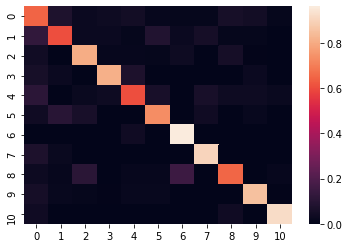

In [25]:
evaluate_multi(load_learner)

['A1' 'A11' 'A12' 'A14' 'A16' 'A17' 'A22' 'A4' 'A7' 'A8' 'A9']